In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# Подмодуль для примитивов
import matplotlib.patches as mpatches

import numpy as np

import math

import clifford as cf

In [2]:
plt.style.use('default_colors.mplstyle')

In [3]:
layout, blades = cf.Cl(2) #задаем пространство (в данном случае двумерное)
locals().update(blades) #создаем переменные, соответствующие базисным векторам

In [16]:
#задаем координаты радиус-векторам
P = np.array([(4, 6), (5, 4)])
P1, P2 = P

#выражаем радиус-векторы через базисные векторы
p1 = P1[0]*e1 + P1[1]*e2
p2 = P2[0]*e1 + P2[1]*e2

In [17]:
#вычитаем из координат конца оси кординаты ее начала
A = np.array([(-6, -6), (6, 6)])
AA = A[1]-A[0]

#выражаем ось с помощью базисных векторов
a = AA[0]*e1 + AA[1]*e2

Text(4.0, 5.0, '')

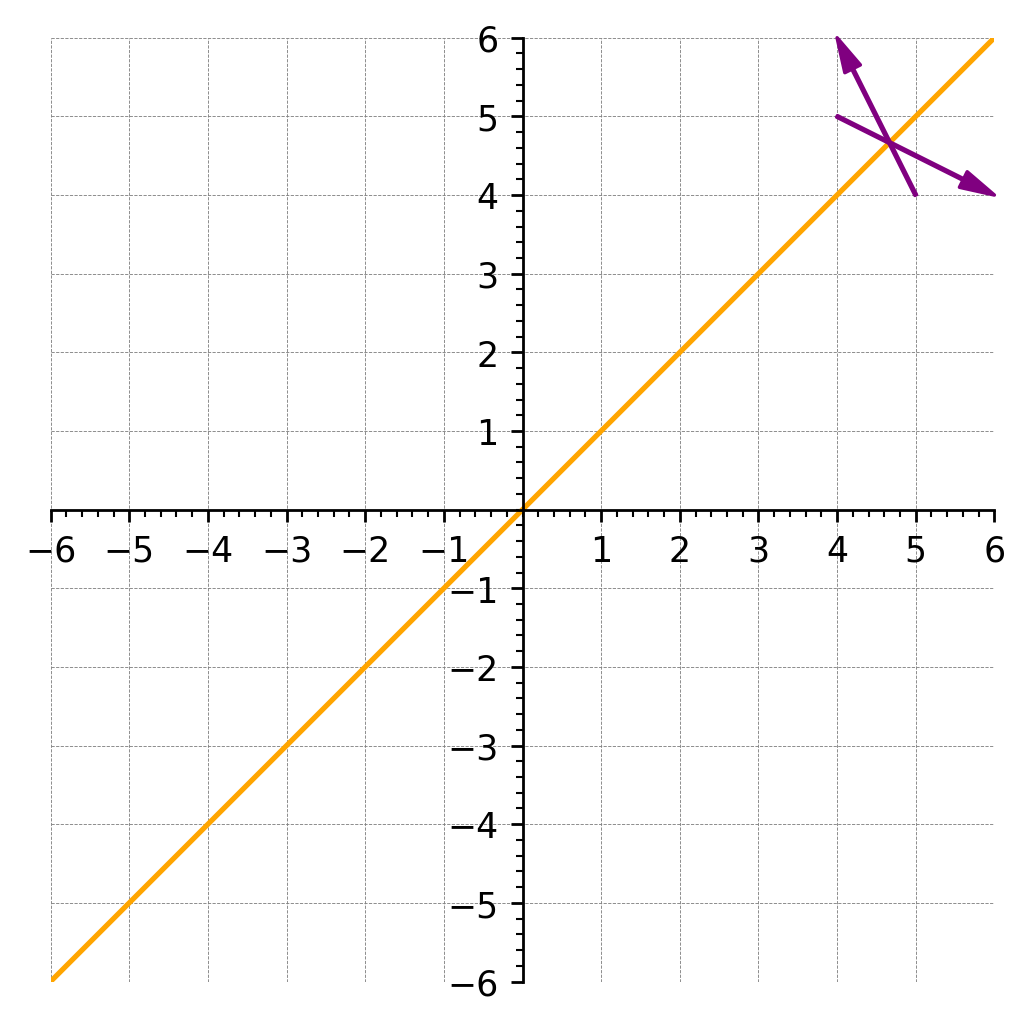

In [18]:
fig01 = plt.figure(num=1, figsize=(5, 5))
ax01 = fig01.add_subplot(1, 1, 1)

# Оформляем систему координат
ax01.set(xlim=(-6, 6), ylim=(-6, 6), aspect='equal')

# Переносим оси координат в центр
ax01.spines['top'].set_visible(False)
ax01.spines['right'].set_visible(False)

ax01.spines['bottom'].set_position('zero')
ax01.spines['left'].set_position('zero')

# Устанавливаем свои засечки на осях координат
ax01.set_xticks([-6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6])
ax01.set_yticks([-6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6])

# Настраиваем стрелку для вектора
arrow_style = dict(width=0.5, headwidth=5, headlength=10, color='purple')

# Рисуем вектор
ax01.annotate(text="", xy=P1, xytext=P2, arrowprops=arrow_style)

# Рисуем прямую
ax01.plot((A[0][0], A[1][0]), (A[0][1], A[1][1]), color='orange')

# Преобразование (отражение)
p1_new = a*p1*(a.inv())
p2_new = a*p2*(a.inv())

P1_new = np.array([p1_new.value[1], p1_new.value[2]])
P2_new = np.array([p2_new.value[1], p2_new.value[2]])

ax01.annotate(text="", xy=P1_new, xytext=P2_new, arrowprops=arrow_style)

# Картинка на плоскости

In [8]:
layout, blades = cf.Cl(2)
locals().update(blades)

In [9]:
P = np.array([2, 1])

p = P[0]*e1 + P[1]*e2

In [10]:
A = np.array([(0, 0), (3, 1)])
AA = A[1]-A[0]

a = AA[0]*e1 + AA[1]*e2

In [11]:
B = np.array([(0, 0), (-1, 2)])
BB = B[1]-B[0]

b = BB[0]*e1 + BB[1]*e2

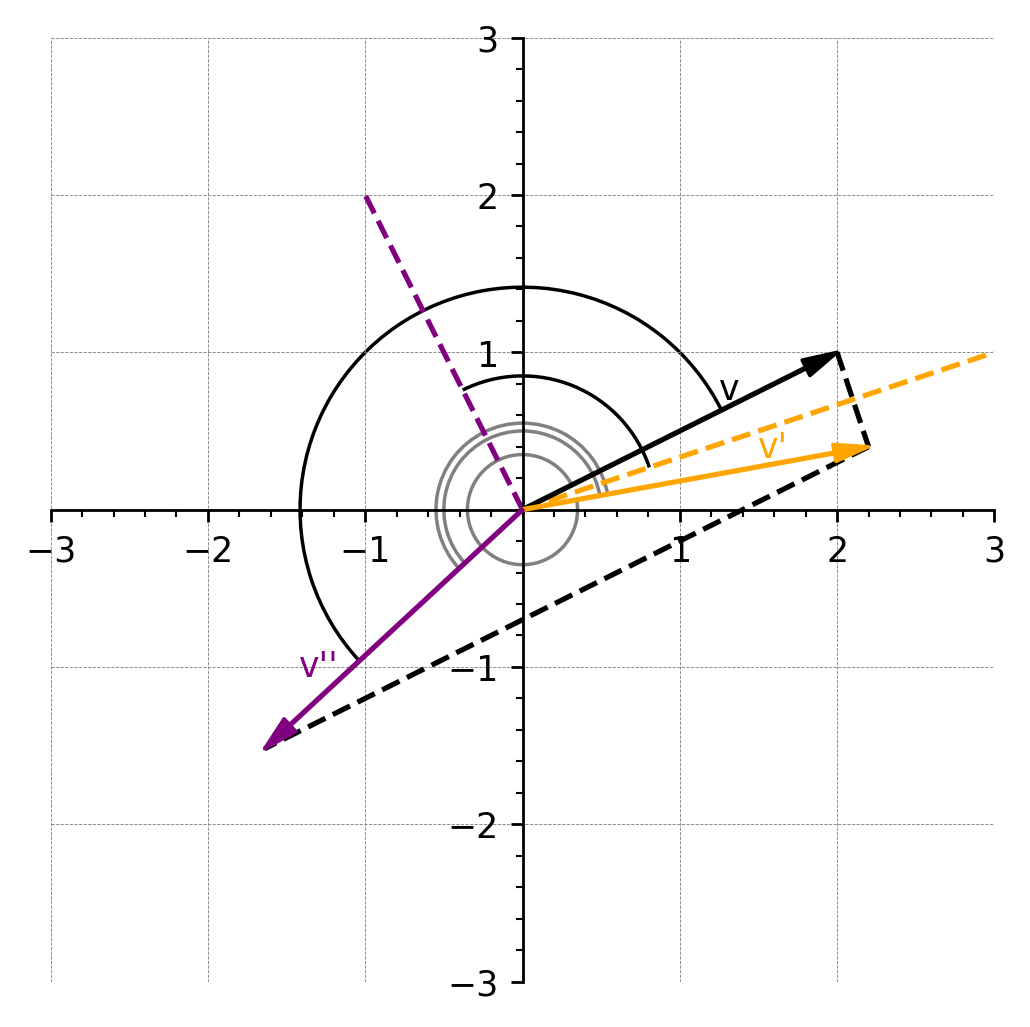

In [12]:
fig02 = plt.figure(num=2, figsize=(5, 5))
ax02 = fig02.add_subplot(1, 1, 1)

# Оформляем систему координат
ax02.set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal')

# Переносим оси координат в центр
ax02.spines['top'].set_visible(False)
ax02.spines['right'].set_visible(False)

ax02.spines['bottom'].set_position('zero')
ax02.spines['left'].set_position('zero')

# Устанавливаем свои засечки на осях координат
ax02.set_xticks([-3, -2, -1, 1, 2, 3])
ax02.set_yticks([-3, -2, -1, 1, 2, 3])

# Рисуем вектор
ax02.annotate(text="", xy=P, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='black'))
ax02.text(x=P[0]/2+0.25, y=P[1]/2+0.2, s='v')

# Рисуем первую прямую
ax02.plot((A[0][0], A[1][0]), (A[0][1], A[1][1]), color='orange', linestyle='--')

# Преобразование (отражение) №1
p_new = a*p*(a.inv())

P_new = np.array([p_new.value[1], p_new.value[2]])

ax02.annotate(text="", xy=P_new, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='orange'))
ax02.text(x=P_new[0]/2+0.4, y=P_new[1]/2+0.13, s="v'", color='orange')

θ1 = math.degrees(math.atan(P[1]/P[0]))
θ2 = math.degrees(math.atan(P_new[1]/P_new[0]))

arc = mpatches.Arc((0, 0), width=0.7, height=0.7, theta1=θ1, theta2=θ2, color='grey')
ax02.add_patch(arc)

ax02.plot((P[0], P_new[0]), (P[1], P_new[1]), color='black', linestyle='--')

# Рисуем вторую прямую
ax02.plot((B[0][0], B[1][0]), (B[0][1], B[1][1]), color='purple', linestyle='--')

# Преобразование (отражение) №2
p_newnew = b*p_new*(b.inv())

P_newnew = np.array([p_newnew.value[1], p_newnew.value[2]])

ax02.annotate(text="", xy=P_newnew, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='purple'))
ax02.text(x=P_newnew[0]/2-0.6, y=P_newnew[1]/2-0.3, s="v''", color='purple')

θ1 = math.degrees(math.atan(P_new[1]/P_new[0]))
θ2 = math.degrees(math.atan(P_newnew[1]/P_newnew[0]))-180

arc = mpatches.Arc((0, 0), width=1, height=1, theta1=θ1, theta2=θ2, color='grey')
ax02.add_patch(arc)
arc = mpatches.Arc((0, 0), width=1.1, height=1.1, theta1=θ1, theta2=θ2, color='grey')
ax02.add_patch(arc)

ax02.plot((P_new[0], P_newnew[0]), (P_new[1], P_newnew[1]), color='black', linestyle='--')

θ1 = math.degrees(math.atan(P[1]/P[0]))
θ2 = math.degrees(math.atan(P_newnew[1]/P_newnew[0]))-180

arc = mpatches.Arc((0, 0), width=math.sqrt(2)*2, height=math.sqrt(2)*2, theta1=θ1, theta2=θ2)
ax02.add_patch(arc)

θ1 = math.degrees(math.atan(A[1][1]/A[1][0]))
θ2 = math.degrees(math.atan(B[1][1]/B[1][0]))-180

arc = mpatches.Arc((0, 0), width=1.7, height=1.7, theta1=θ1, theta2=θ2)
ax02.add_patch(arc)

# Отражение вектора относительно прямой линии в пространстве

In [13]:
layout, blades = cf.Cl(3)
locals().update(blades)

In [14]:
P = np.array([(-1, 0, 1), (2, 1, 3)])
P1, P2 = P

p1 = P1[0]*e1 + P1[1]*e2 + P1[2]*e3
p2 = P2[0]*e1 + P2[1]*e2 + P2[2]*e3

In [15]:
A = np.array([(-4, -4, -4), (4, 4, 4)])
AA = A[1]-A[0]

a = AA[0]*e1 + AA[1]*e2 + AA[2]*e3

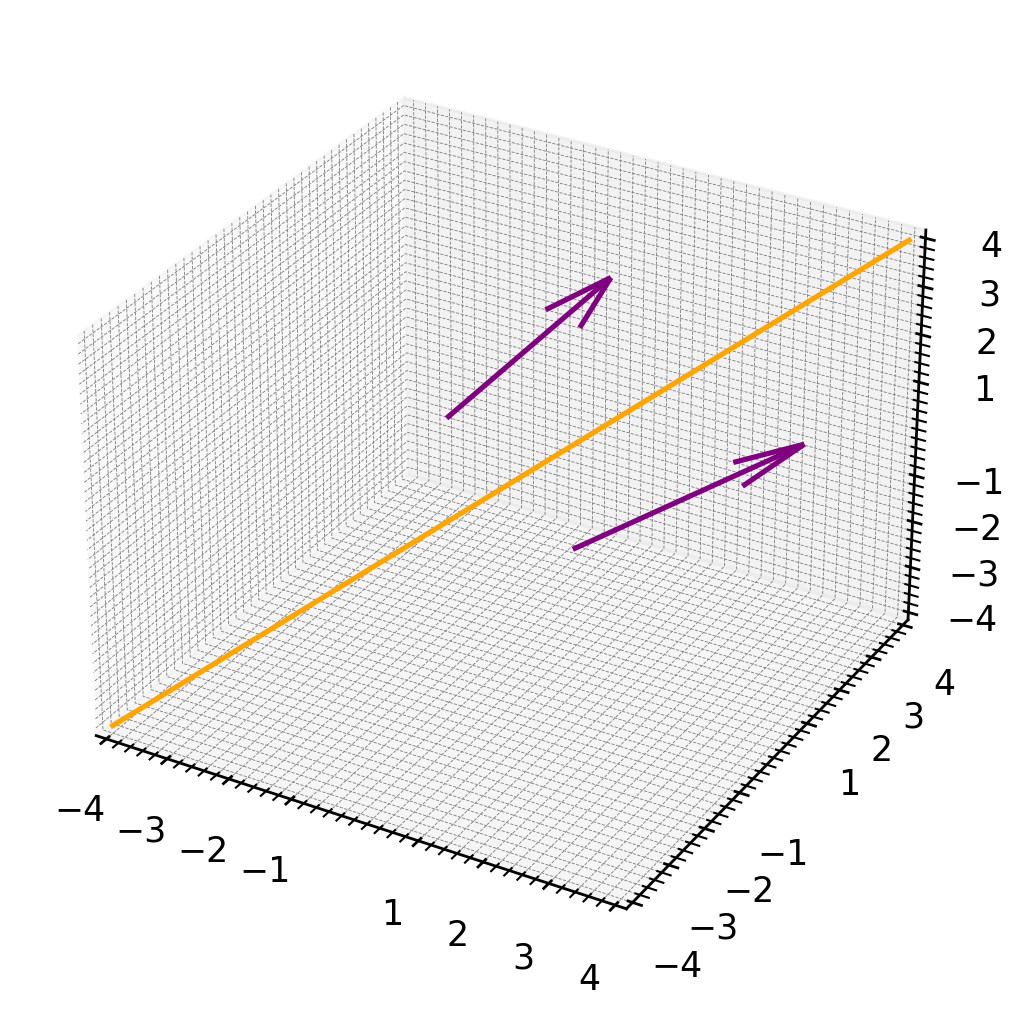

In [16]:
fig03 = plt.figure(num=3, figsize=(5, 5))
ax03 = fig03.add_subplot(1, 1, 1, projection='3d')

# Оформляем систему координат
ax03.set(xlim=(-4, 4), ylim=(-4, 4), zlim=(-4, 4), aspect='auto')

# Устанавливаем свои засечки на осях координат
ax03.set_xticks([-4, -3, -2, -1, 1, 2, 3, 4])
ax03.set_yticks([-4, -3, -2, -1, 1, 2, 3, 4])
ax03.set_zticks([-4, -3, -2, -1, 1, 2, 3, 4])

# Рисуем вектор
ax03.quiver3D(*P1, *P2, color='purple')

# Рисуем прямую
ax03.plot((A[0][0], A[1][0]), (A[0][1], A[1][1]), (A[0][2], A[1][2]), color='orange')

# Преобразование (отражение)
p1_new = a*p1*(a.inv())
p2_new = a*p2*(a.inv())

P1_new = np.array([p1_new.value[1], p1_new.value[2], p1_new.value[3]])
P2_new = np.array([p2_new.value[1], p2_new.value[2], p2_new.value[3]])

ax03.quiver3D(*P1_new, *P2_new, color='purple')

# Поворот вектора в двумерном пространстве

# Поворот вектора в трехмерном пространстве

In [17]:
layout, blades = cf.Cl(3)
locals().update(blades)

In [143]:
# Заданный вектор
P = np.array([(0, 2, 0), (0, 1, 0)])
P1, P2 = P

p1 = P1[0]*e1 + P1[1]*e2 + P1[2]*e3
p2 = P2[0]*e1 + P2[1]*e2 + P2[2]*e3

In [144]:
# Ось вращения
U = np.array([1, 0, 10])
U_norm = U/np.linalg.norm(U)
u = (U_norm[0]*e1 + U_norm[1]*e2 + U_norm[2]*e3).right_complement()

# Угол вращения
α = 2*math.pi/3

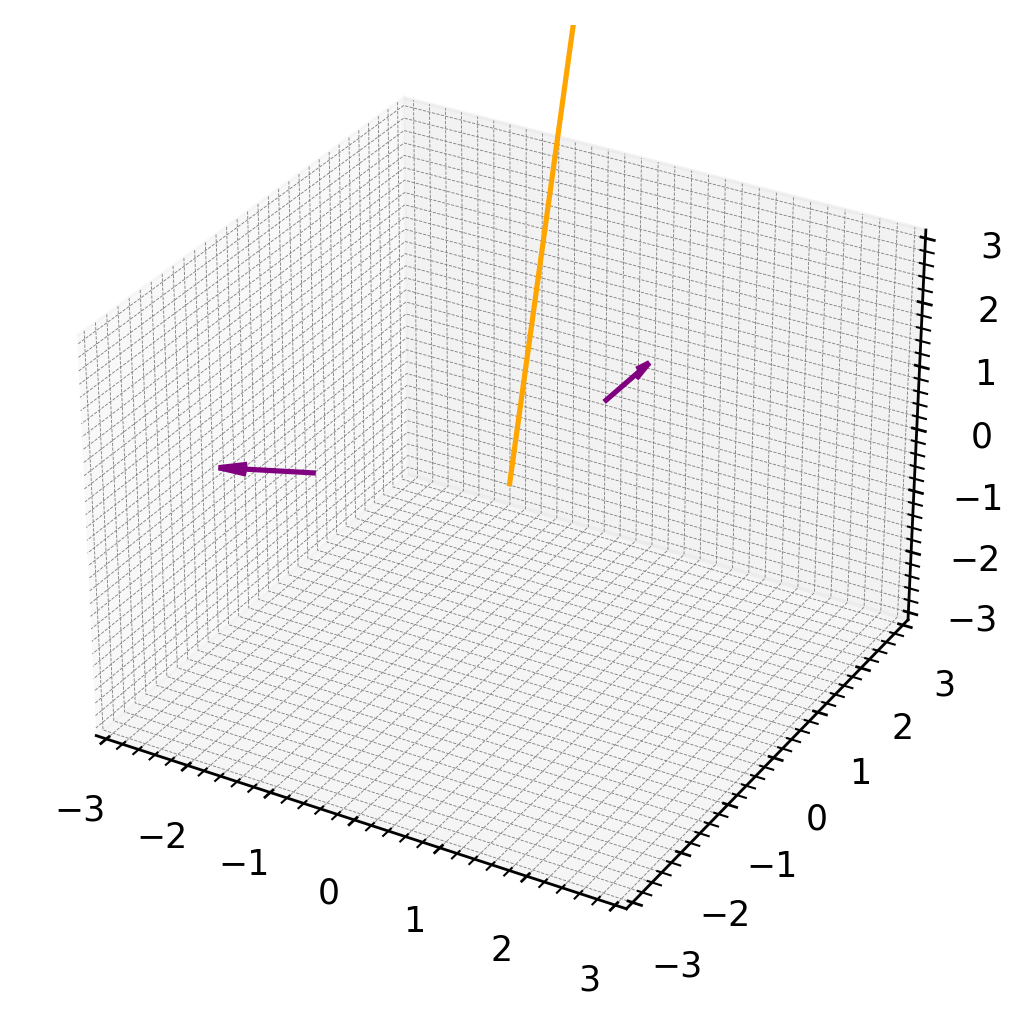

In [145]:
fig04 = plt.figure(num=4, figsize=(5, 5))
ax04 = fig04.add_subplot(1, 1, 1, projection='3d')

# Оформляем систему координат
ax04.set(xlim=(-3, 3), ylim=(-3, 3), zlim=(-3, 3), aspect='auto')

# Устанавливаем свои засечки на осях координат
ax04.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax04.set_yticks([-3, -2, -1, 0, 1, 2, 3])
ax04.set_zticks([-3, -2, -1, 0, 1, 2, 3])

# Рисуем вектор
ax04.quiver3D(*P1, *P2, color='purple')

# Рисуем ось вращения
ax04.plot((0, U[0]), (0, U[1]), (0, U[2]), color='orange')

# Преобразование (поворот)
R = math.cos(α/2) - math.sin(α/2)*u

p1_new = R*p1*R.conjugate()
p2_new = R*p2*R.conjugate()

P1_new = np.array([p1_new.value[1], p1_new.value[2], p1_new.value[3]])
P2_new = np.array([p2_new.value[1], p2_new.value[2], p2_new.value[3]])

ax04.quiver3D(*P1_new, *P2_new, color='purple')